In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
data =  np.loadtxt('/home/bhavy/Dropbox/7th-semester/courses/ML/Assignments/Assignment/hw2/binclass.txt', delimiter=',')

In [3]:
def sig(data, mu):
    ans = 0
    temp = data - mu
    for i in range(len(data)):
        ans  = ans + np.dot(temp[i], temp[i])
    return np.sqrt(ans/(2*len(data)))

In [4]:
mu_p = np.zeros((2, 1), dtype ='float32')
mu_m = np.zeros((2, 1), dtype ='float32')
sig_p  =  0.0
sig_m = 0.0

In [5]:
pos_data = data[data[: , -1] == 1]
neg_data = data[data[: , -1] == -1]

In [6]:
pos_data = pos_data[: , 0:2]
neg_data = neg_data[: , 0:2]

In [7]:
mu_p = np.sum(pos_data, axis = 0)/len(pos_data)
mu_m = np.sum(neg_data, axis = 0)/len(neg_data)

In [8]:
sig_p = sig(pos_data, mu_p)
sig_m = sig(neg_data, mu_m)

In [9]:
x = np.arange(-10, 45, 0.01)
y = np.arange(-20, 35, 0.01)
X, Y = np.meshgrid(x, y)
Z = ((X - mu_p[0])**2 + (Y - mu_p[1])**2 )/sig_p**2 - ((X - mu_m[0])**2 + (Y - mu_m[1])**2 )/sig_m**2

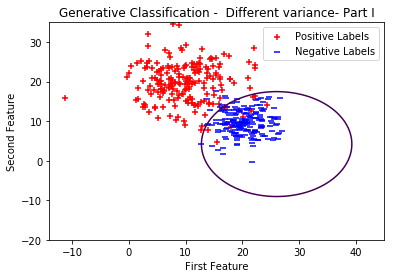

In [10]:
plt.figure()
plt.scatter(pos_data[:, 0], pos_data[:, 1], c ='r', marker='+')
plt.scatter(neg_data[:, 0], neg_data[:, 1], c ='b', marker='_')
plt.contour(X, Y, Z, levels = [0])
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.title("Generative Classification -  Different variance- Part I")
plt.legend(["Positive Labels", "Negative Labels"])

In [11]:
Z = ((X - mu_p[0])**2 + (Y - mu_p[1])**2 ) - ((X - mu_m[0])**2 + (Y - mu_m[1])**2 )

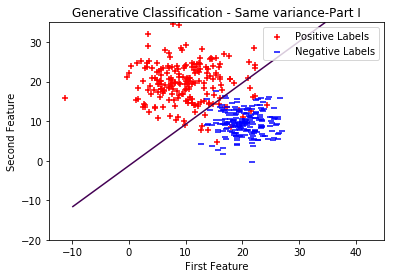

In [12]:
plt.figure()
plt.scatter(pos_data[:, 0], pos_data[:, 1], c ='r', marker='+')
plt.scatter(neg_data[:, 0], neg_data[:, 1], c ='b', marker='_')
plt.contour(X, Y, Z, levels = [0])
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.title("Generative Classification - Same variance-Part I")
plt.legend(["Positive Labels", "Negative Labels"])

In [13]:
clf = svm.SVC(kernel = 'linear')
clf.fit(data[:, 0:2], data[:, -1])
Z = clf.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

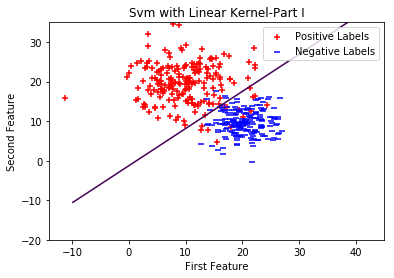

In [14]:
plt.figure()
plt.scatter(pos_data[:, 0], pos_data[:, 1], c ='r', marker='+')
plt.scatter(neg_data[:, 0], neg_data[:, 1], c ='b', marker='_')
plt.contour(X, Y, Z, levels = [0])
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.title("Svm with Linear Kernel-Part I")
plt.legend(["Positive Labels", "Negative Labels"])